## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

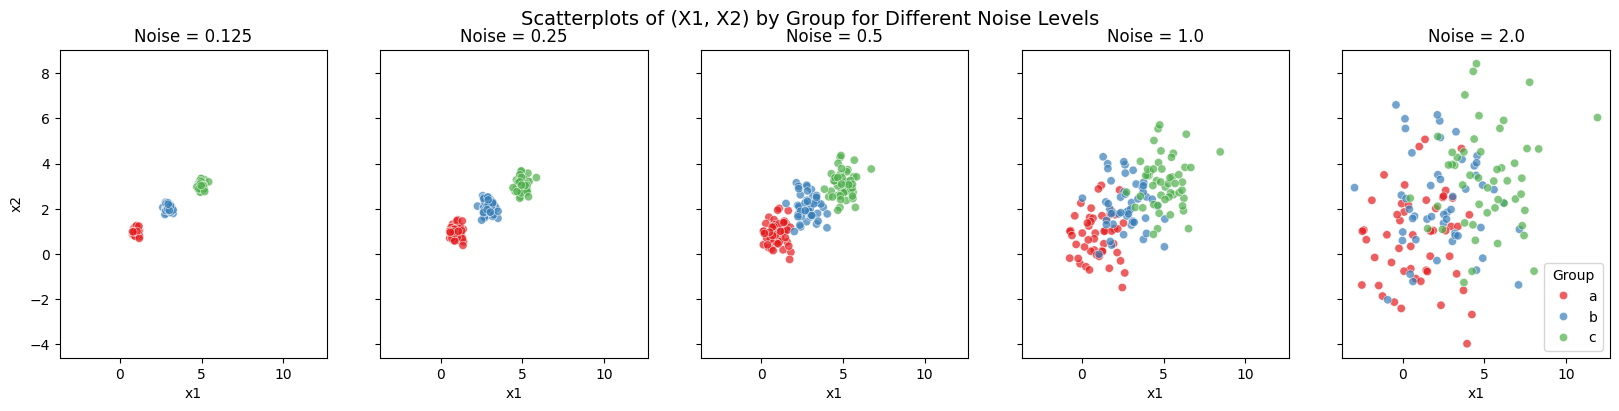

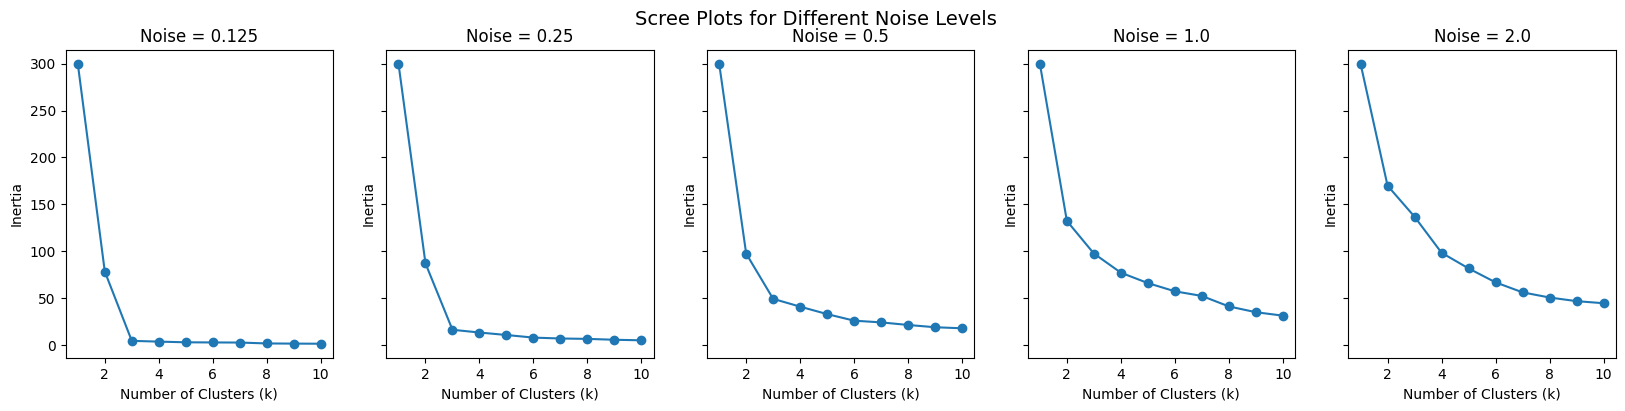

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

#Q2
datasets = [(df0_125, "Noise = 0.125"), (df0_25, "Noise = 0.25"), (df0_5, "Noise = 0.5"),
            (df1_0, "Noise = 1.0"), (df2_0, "Noise = 2.0")]

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

for ax, (df, title) in zip(axes, datasets):
    sns.scatterplot(data=df, x="x1", y="x2", hue="group", ax=ax, palette="Set1", alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend().remove()

axes[-1].legend(title="Group")

plt.suptitle("Scatterplots of (X1, X2) by Group for Different Noise Levels", fontsize=14)
plt.show()



#Q3
def create_scree_plot(data, ax, title):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['x1', 'x2']])

    # Calculate inertia for k = 1 to 10
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)

    ax.plot(range(1, 11), inertias, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Inertia')

# Generate scree plots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for ax, (df, title) in zip(axes, datasets):
    create_scree_plot(df, ax, title)

plt.suptitle("Scree Plots for Different Noise Levels", fontsize=14)
plt.show()


**Question 1 Responses:**

2. As the noise increases from 0.125 to 2.0, the clusters become more spread out and they start to overlap. This makes it harder to see clear groupings, and the points mix together with each more.
3. As the noise levels increase, the scree plots have a smaller overall range on the vertical axis, and the drop in inertia becomes less dramatic. This makes the “elbow” harder to see, so choosing the best number of clusters becomes more uncertain. At lower noise levels, there is a sharper and claerer elbow and a bigger drop in inertia, making it easier to pick a single k.
4. In these simulations, we see the inertia drop quickly as we add more clusters, but eventually the improvement slows down. This turning point is the “elbow,” and this indicates where adding more clusters no longer provides a large benefit.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         537 non-null    int64 
 1   Member        537 non-null    object
 2   Party         537 non-null    object
 3   State         537 non-null    object
 4   Chamber       537 non-null    object
 5   Raised        537 non-null    object
 6   Spent         537 non-null    object
 7   Cash on Hand  537 non-null    object
 8   Debts         537 non-null    object
dtypes: int64(1), object(8)
memory usage: 37.9+ KB
None
   index              Member       Party       State Chamber       Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   $7,719,396   
1      1      Adam Kinzinger  Republican    Illinois   House   $2,192,741   
2      2         Adam Schiff  Democratic  California   House  $20,993,041   
3      3          Adam Smith  Democratic  Washington   House   $1,211,

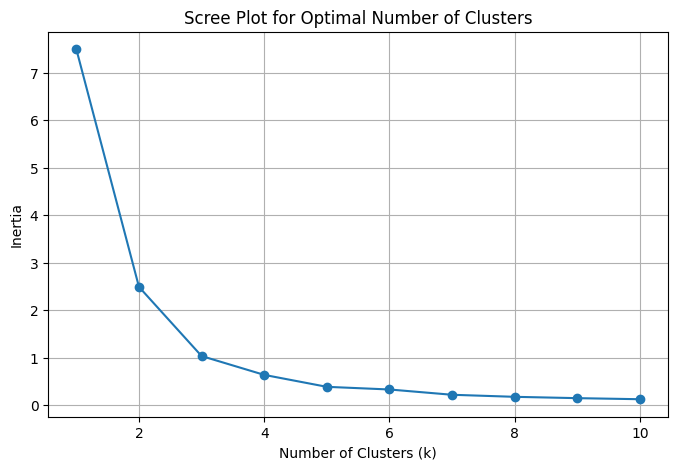

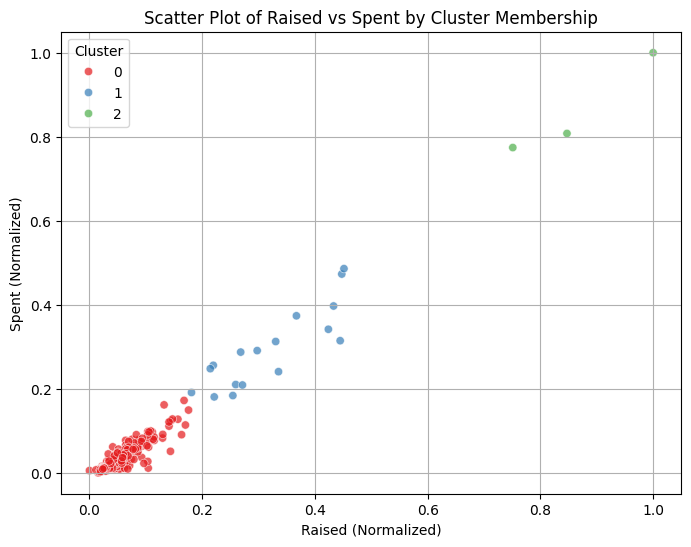

Cluster 0:
                 Member       Party           State    Raised     Spent
0    Abigail Spanberger  Democratic        Virginia  0.103512  0.098074
1        Adam Kinzinger  Republican        Illinois  0.040686  0.016371
3            Adam Smith  Democratic      Washington  0.029527  0.015449
4          Adrian Smith  Republican        Nebraska  0.034148  0.021915
5     Adriano Espaillat  Democratic        New York  0.029159  0.011696
..                  ...         ...             ...       ...       ...
532     William Timmons  Republican  South Carolina  0.025901  0.010847
533           Young Kim  Republican      California  0.105571  0.097157
534       Yvette Clarke  Democratic        New York  0.023538  0.008720
535      Yvette Herrell  Republican      New Mexico  0.058704  0.036159
536         Zoe Lofgren  Democratic      California  0.034852  0.027688

[517 rows x 5 columns]


Cluster 1:
                     Member       Party           State    Raised     Spent
2           

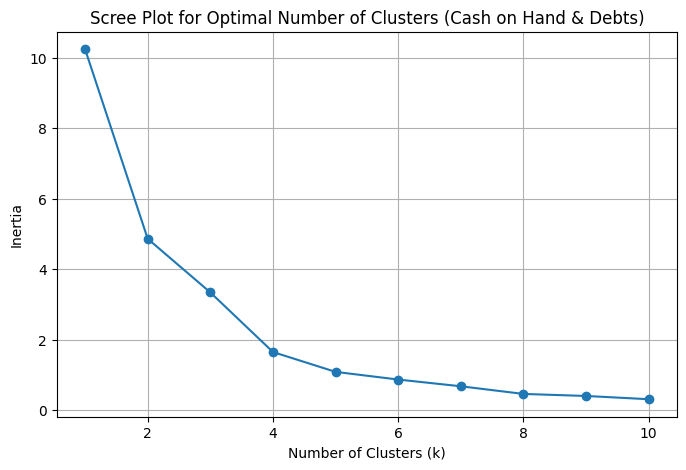

   Cash on Hand  Debts  Cluster_Cash_Debts
0      0.040154    0.0                   0
1      0.111166    0.0                   0
2      0.920268    0.0                   1
3      0.030150    0.0                   0
4      0.050962    0.0                   0


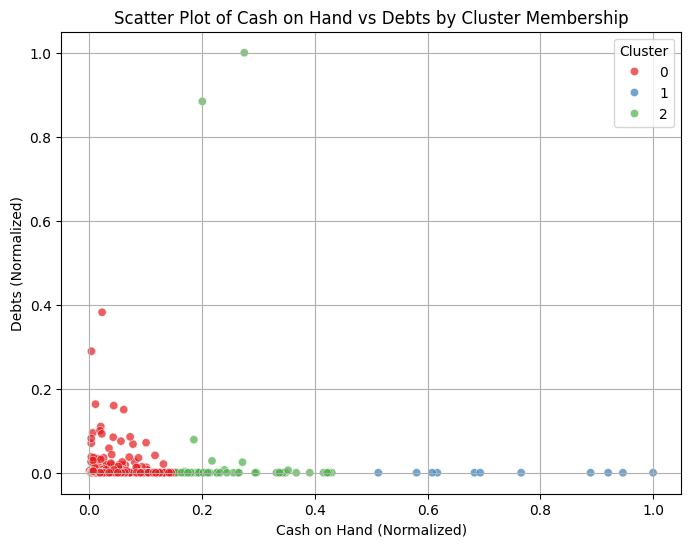

               Member       Party       State  Cash on Hand     Debts  \
0  Abigail Spanberger  Democratic    Virginia      0.040154  0.000000   
1      Adam Kinzinger  Republican    Illinois      0.111166  0.000000   
2         Adam Schiff  Democratic  California      0.920268  0.000000   
3          Adam Smith  Democratic  Washington      0.030150  0.000000   
4        Adrian Smith  Republican    Nebraska      0.050962  0.000000   
5   Adriano Espaillat  Democratic    New York      0.020041  0.000000   
6            Al Green  Democratic       Texas      0.015839  0.003759   
7           Al Lawson  Democratic     Florida      0.013279  0.000000   
8      Alan Lowenthal  Democratic  California      0.015324  0.000000   
9         Albio Sires  Democratic  New Jersey      0.008454  0.000000   

   Cluster_Cash_Debts  
0                   0  
1                   0  
2                   1  
3                   0  
4                   0  
5                   0  
6                   0  
7   

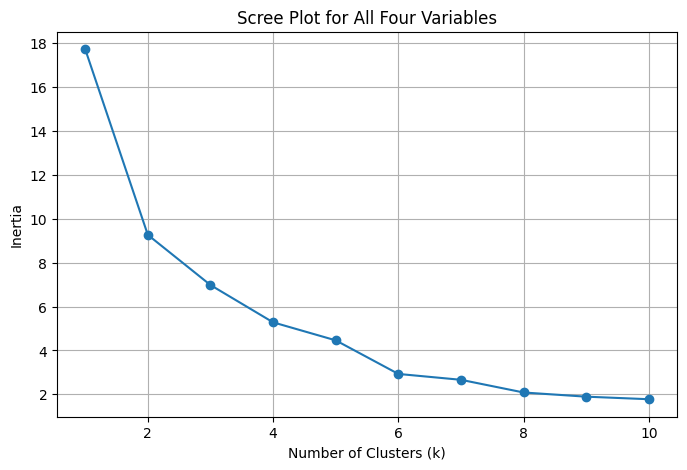

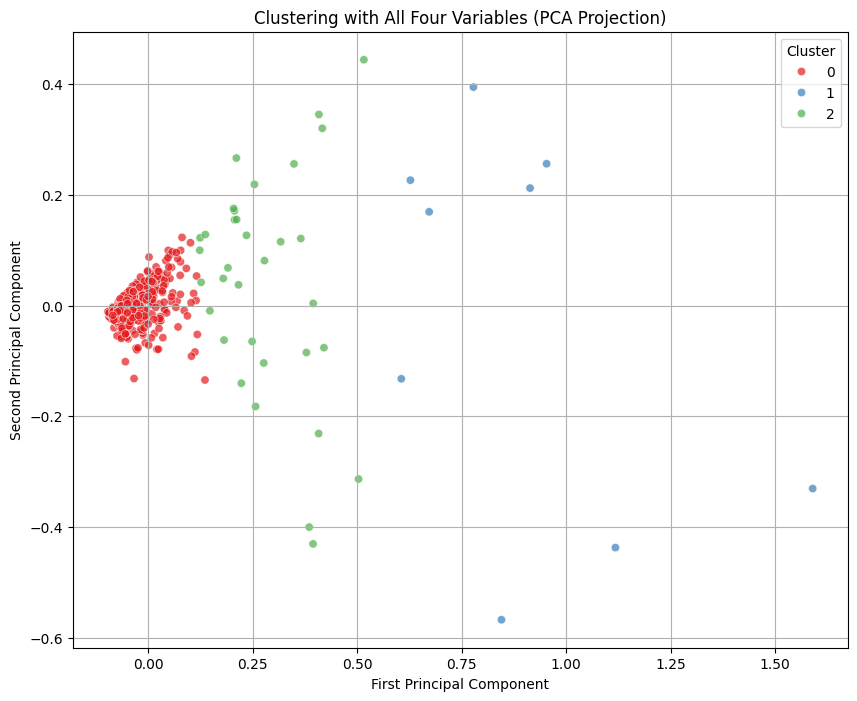

--- Cluster 0 ---
                 Member       Party           State    Raised     Spent  \
0    Abigail Spanberger  Democratic        Virginia  0.103512  0.098074   
1        Adam Kinzinger  Republican        Illinois  0.040686  0.016371   
3            Adam Smith  Democratic      Washington  0.029527  0.015449   
4          Adrian Smith  Republican        Nebraska  0.034148  0.021915   
5     Adriano Espaillat  Democratic        New York  0.029159  0.011696   
..                  ...         ...             ...       ...       ...   
532     William Timmons  Republican  South Carolina  0.025901  0.010847   
533           Young Kim  Republican      California  0.105571  0.097157   
534       Yvette Clarke  Democratic        New York  0.023538  0.008720   
535      Yvette Herrell  Republican      New Mexico  0.058704  0.036159   
536         Zoe Lofgren  Democratic      California  0.034852  0.027688   

     Cash on Hand     Debts  
0        0.040154  0.000000  
1        0.111166  0.

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA

#Q1
df = pd.read_csv('./data/2022 election cycle fundraising.csv')
print(df.info())
print(df.head(10))

def clean_dollar_column(column):
    return column.str.replace(r'[$,]', '', regex=True).astype(float)

dollar_columns = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df[dollar_columns] = df[dollar_columns].apply(clean_dollar_column)

print(df[dollar_columns].head())
print(df[dollar_columns].isnull().sum())
print(df[dollar_columns].describe())

#Q2
columns_to_normalize = ['Raised', 'Spent']
# Apply Min-Max normalization
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df[columns_to_normalize].head())

# Calculate inertia for k = 1 to 10
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(df[columns_to_normalize])
    inertias.append(kmeans.inertia_)

# Plot scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Scree Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()

# Perform K-Means clustering with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
df['Cluster'] = kmeans.fit_predict(df[columns_to_normalize])

print(df[['Raised', 'Spent', 'Cluster']].head())

# Scatter plot of Raised vs Spent by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Raised vs Spent by Cluster Membership')
plt.xlabel('Raised (Normalized)')
plt.ylabel('Spent (Normalized)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

for cluster_id in df['Cluster'].unique():
    print(f"Cluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id][['Member', 'Party', 'State', 'Raised', 'Spent']])
    print("\n")

cluster_sizes = df['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

smallest_clusters = cluster_sizes.nsmallest(2)
print("\nSmallest Clusters:")
print(smallest_clusters)

small_cluster_politicians = df[df['Cluster'] == smallest_clusters.index[0]]
print(small_cluster_politicians[['Member', 'Party', 'State', 'Raised', 'Spent']])
#Q3
columns_to_normalize = ['Cash on Hand', 'Debts']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print(df[columns_to_normalize].head())

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(df[columns_to_normalize])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Scree Plot for Optimal Number of Clusters (Cash on Hand & Debts)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
df['Cluster_Cash_Debts'] = kmeans.fit_predict(df[columns_to_normalize])
print(df[['Cash on Hand', 'Debts', 'Cluster_Cash_Debts']].head())

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster_Cash_Debts', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Cash on Hand vs Debts by Cluster Membership')
plt.xlabel('Cash on Hand (Normalized)')
plt.ylabel('Debts (Normalized)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

print(df[['Member', 'Party', 'State', 'Cash on Hand', 'Debts', 'Cluster_Cash_Debts']].head(10))
cluster_counts = df['Cluster_Cash_Debts'].value_counts()
print("Cluster Sizes (Cash on Hand & Debts):")
print(cluster_counts)

for cluster_id in df['Cluster_Cash_Debts'].unique():
    print(f"\nCluster {cluster_id}:")
    cluster_data = df[df['Cluster_Cash_Debts'] == cluster_id][['Member', 'Party', 'State', 'Cash on Hand', 'Debts']]
    print(cluster_data)

#Q4

inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(df[dollar_columns])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Scree Plot for All Four Variables")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

optimal_k = 3
kmeans_all = KMeans(n_clusters=optimal_k, random_state=100)
df['Cluster_All'] = kmeans_all.fit_predict(df[dollar_columns])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df[dollar_columns])
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_All', palette='Set1', alpha=0.7)
plt.title("Clustering with All Four Variables (PCA Projection)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

for cluster_id in sorted(df['Cluster_All'].unique()):
    print(f"--- Cluster {cluster_id} ---")
    print(df[df['Cluster_All'] == cluster_id][['Member', 'Party', 'State', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])
    print("\n")

**Question 2 Responses:**

1. The dollar amounts in the dataset are stored as strings with \$ signs and commas, which makes them difficult to analyze numerically. To clean them, I removed these symbols using the .str.replace(r'[$,]', '', regex=True) method and I converted the values to floats. This allows me to perform calculations like sums, averages, and comparisons on the financial data.
2. I can see one large cluster of politicians who raised and spent relatively little, one medium cluster of higher fundraisers like Adam Schiff and Chuck Schumer, and then one very small cluster of the top spenders like Mark Kelly and Raphael Warnock. The smallest two clusters are these medium and high spending groups, which include several well-known Senate candidates. Many of these races were competitive or high-profile, which often leads to bigger fundraising totals.
3. I can see different clusters when I look at Cash on Hand and Debts compared to Raised and Spent. Some candidates end up with a lot of leftover funds or very little debt, which changes how they group together. Also, close or expensive races can affect whether candidates have large debts or still hold significant cash at the end of the campaign.
4. The k-Means clustering algorithm found meaningful patterns in the election data by grouping politicians based on their financial activity. Cluster 0 contained the most politicians, where fundraising and spending was fairly moderate, most likely due to less competitive races. Cluster 1 had candidates with higher financial activity, suggesting more intense or high-profile elections. Cluster 2 represented a small group with extreme financial values, such as high cash on hand or significant debt, indicating unique campaign strategies. These insights help us understand how financial factors influence election dynamics and they could be further analyzed by comparing election outcomes and competitiveness.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?